In [105]:
from collections import Counter
import pickle
import re
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
repertoire_racine = '/home/michel/jorf_plat/'
with open(repertoire_racine + 'concat_article.txt', 'r') as f:
    contenu = f.read()

In [4]:
compteur = Counter(contenu)
compteur

Counter({'\t': 2738554,
         '\n': 89510415,
         ' ': 287812336,
         '!': 1890,
         '"': 102349,
         '#': 3785,
         '$': 120,
         '%': 193167,
         '&': 580473,
         "'": 14000885,
         '(': 5559658,
         ')': 5877771,
         '*': 104008,
         '+': 54276,
         ',': 17318524,
         '-': 8124828,
         '.': 17829298,
         '/': 858871,
         '0': 9807904,
         '1': 10728137,
         '2': 8422245,
         '3': 5221511,
         '4': 4039488,
         '5': 3967744,
         '6': 3115135,
         '7': 2962058,
         '8': 3014062,
         '9': 4675904,
         ':': 3123032,
         ';': 3050981,
         '=': 1512435,
         '?': 13687,
         '@': 17420,
         'A': 6820136,
         'B': 2125038,
         'C': 5168622,
         'D': 2998667,
         'E': 5854500,
         'F': 1923429,
         'G': 1713810,
         'H': 1202761,
         'I': 4833243,
         'J': 1436916,
         'K': 206900,
 

In [5]:
tous_les_caracteres = list(compteur.keys())
tous_les_caracteres.sort()
''.join(tous_les_caracteres)

'\t\n !"#$%&\'()*+,-./0123456789:;=?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\\]^_`abcdefghijklmnopqrstuvwxyz{|}~\x80\x83\x84\x8c\x8d\x90\x92\x94\x97\x9c\x9d\x9f\xa0¢£¦§¨©«¬\xad®¯°±²³´µ·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÍÎÏÑÓÔÕÖ×ØÙÚÛÜßàáâãäåæçèéêëìíîïñòóôõöøùúûüýÿāĂăČčğĪİıłŃńŅōŒœŠšŪūŸźžƌƐƒȊșȹʃʎʹʺʼ˃˜˝ˮ̀́̂ΑΒΔΘΣΦΩαβγδεθλμπρστφωϕЀДЖИКМПРСФХЧабвеиклмопрстујҩӨᵠ\u2002\u2003\u200b\u200c\u200d\u200e‐‑‒–—―‘’‚“”„‟†‡•…\u2028\u202a\u202f‰′›\u206a€™↑→↓↔∆∑−√∞∩≈≠≤≥▎■□▪●⩽⩾\uf063\uf06f\uf07f\ufeff'

In [6]:
liste_minuscules = 'abcdefghijklmnopqrstuvwxyzàâäéèêëïîôöùûüÿçæœ'
liste_majuscules = 'ABCDEFGHIJKLMNOPQRSTUVWXYZÀÂÄÉÈÊËÏÎÔÖÙÛÜŸÇÆŒ'
ensemble_minuscules = set(liste_minuscules)
ensemble_majuscules = set(liste_majuscules)
ensemble_lettres = ensemble_minuscules | ensemble_majuscules

In [7]:
majuscule_a_minuscule = {
    liste_majuscules[i]: liste_minuscules[i]
    for i in range(len(liste_minuscules))
}

## Ne garde que les lettres

In [38]:
contenu_espace = ''.join([c if c in ensemble_lettres else ' ' for c in contenu])

In [40]:
contenu_minuscule = ''.join([majuscule_a_minuscule[c] if c in ensemble_majuscules else c for c in contenu_espace])

In [44]:
liste_mots = contenu_minuscule.split(' ')

In [55]:
len(liste_mots)

520654151

In [56]:
liste_mots_pleins = [mot for mot in liste_mots if mot]

In [57]:
len(liste_mots_pleins)

264152316

In [58]:
with open(repertoire_racine + 'liste_mots_article.txt', 'wb') as f:
    pickle.dump(liste_mots_pleins, f)

In [59]:
compteur_mots = Counter(liste_mots_pleins)

In [60]:
with open(repertoire_racine + 'compteur_mots_article.txt', 'wb') as f:
    pickle.dump(compteur_mots, f)

## Garde tout, sépare en paragraphes

In [19]:
# sépare en paragraphes
liste_paragraphe = contenu.split('\n')

In [20]:
len(liste_paragraphe)

89510416

In [21]:
for i, paragraphe in enumerate(liste_paragraphe):
    paragraphe = paragraphe.strip()
    paragraphe = re.sub('[ \t\r\n\xa0]+', ' ', paragraphe)
    liste_paragraphe[i] = paragraphe

In [22]:
liste_paragraphe = [p for p in liste_paragraphe if p]

In [138]:
liste_paragraphe = [p for p in liste_paragraphe if p not in ['A N N E X E', 'a n n e x e']]

In [139]:
len(liste_paragraphe)

20835740

In [140]:
liste_paragraphe[:100]

['Art. 2. - Le directeur des personnels administratifs, ouvriers et de service et le directeur de l’enseignement français en Allemagne sont chargés, chacun en ce qui le concerne, de l’exécution du présent arrêté, qui sera publié au Journal officiel de la République française.',
 "FONDS NATIONAL DE DÉVELOPPEMENT ET DE MODERNISATION DE L'APPRENTISSAGE",
 'Première section',
 'Année 2006',
 '(Montants en euros)',
 "Sont rendues obligatoires, pour tous les employeurs et tous les salariés compris dans le champ d'application de la convention collective régionale de l'industrie de la manutention et du nettoyage sur les aéroports ouverts à la circulation publique dans la région parisienne du 1er octobre 1985, les dispositions de l'avenant n° 36 du 24 février 2006, relatif aux salaires et aux classifications (barèmes annexés), à la convention collective régionale susvisée.",
 'Les grilles de salaires des filières manutention et nettoyage figurant en annexe sont étendues sous réserve du respect 

In [141]:
with open(repertoire_racine + 'liste_paragraphe.txt', 'wb') as f:
    pickle.dump(liste_paragraphe, f)

## Trouve les dates

In [142]:
regex_date = r'(?:^|\D)((1er|\d{1,2}) (janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre) (\d{4}))(?:\D|$)'
#regex_date = r'((1er|\d{1,2}) (janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre) (\d{4}))'


In [143]:
re.findall(regex_date, 'erz42 janvier 1912sds')

[('42 janvier 1912', '42', 'janvier', '1912')]

In [144]:
[(m.groups(), m.start(1), m.end(1)) for m in re.finditer(regex_date, '42 janvier 1912sds')]

[(('42 janvier 1912', '42', 'janvier', '1912'), 0, 15)]

In [145]:
liste_texte_date = []
mention_date = []
for paragraphe in liste_paragraphe:
    liste_mention = []
    for m in re.finditer(regex_date, paragraphe):
        liste_mention.append((m.start(1), m.end(1)))
        liste_texte_date.append(m.groups())
    mention_date.append(liste_mention)

In [146]:
len(liste_texte_date), len(liste_texte_date_2)

(2242394, 2242694)

In [147]:
with open(repertoire_racine + 'mention_date.txt', 'wb') as f:
    pickle.dump(mention_date, f)

In [148]:
numero_mois = {
    'janvier': 1,
    'février': 1,
    'mars': 1,
    'avril': 1,
    'mai': 1,
    'juin': 1,
    'juillet': 1,
    'août': 1,
    'septembre': 1,
    'octobre': 1,
    'novembre': 1,
    'décembre': 1,
}

In [149]:
liste_date = []
for texte_date in liste_texte_date:
    texte_total, texte_jour, texte_mois, texte_annee = texte_date
    if texte_jour == '1er':
        jour = 1
    else:
        jour = int(texte_jour)
    if jour > 31:
        print('*****' + texte_total)
        continue
    mois = numero_mois[texte_mois]
    annee = int(texte_annee)
    date = datetime.date(day=jour, month=mois, year=annee)
    liste_date.append(date)

*****53 septembre 2005
*****60 août 1992
*****76 avril 2012
*****55 février 2010
*****41 octobre 2005
*****43 janvier 2008
*****45 mars 2008
*****63 juin 2008
*****47 mai 2008
*****73 décembre 2010
*****88 novembre 2010
*****59 avril 2011
*****61 juillet 2010
*****88 août 2010
*****83 septembre 2010
*****37 octobre 2011
*****53 décembre 2010
*****79 janvier 2011
*****32 janvier 2011
*****36 février 2011
*****90 février 2011
*****77 février 2011
*****36 mars 2011
*****90 mars 2011
*****74 mars 2011
*****41 février 1920
*****56 janvier 2009


In [150]:
len(liste_date)

2242367

In [166]:
def trouve(chaine, n=20, i=0):
    decalage = 0
    index = 0
    for k in range(i+1):
        decalage += index + 1
        index = contenu[decalage:].index(chaine)
    print(contenu[index+decalage-n:index+decalage+n])

In [151]:
date_min = datetime.date(1800, 1, 1)
date_max = datetime.date(2060, 1, 1)
liste_date = [d for d in liste_date if (d >= date_min and d < date_max)]

(708205.0, 737425.0)

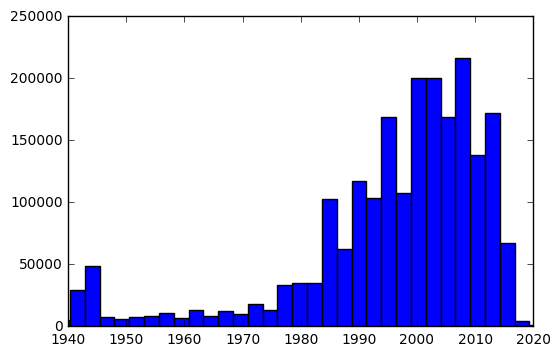

In [152]:
date_min = datetime.date(1940, 1, 1)
date_max = datetime.date(2020, 1, 1)
plt.hist(liste_date, bins=100)
plt.xlim(date_min, date_max)

In [178]:
trouve(' alinei', 200)

ValueError: substring not found